In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.datasets import load_files

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("C:/Users/pc/anaconda3/Lib/site-packages/mglearn/data/aclImdb/train/")

In [3]:
text_train, y_train = reviews_train.data, reviews_train.target
print(f"Type of text_train: {type(text_train)}")
print(f"Length of text_train: {len(text_train)}")
print(f"text_train[6]:\n{text_train[6]}")

Type of text_train: <class 'list'>
Length of text_train: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
print(f"Samples per class (training): {np.bincount(y_train)}")

Samples per class (training): [12500 12500]


In [6]:
reviews_test = load_files("C:/Users/pc/anaconda3/Lib/site-packages/mglearn/data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print(f"Number of documents in test class: {len(text_test)}")
print(f"Samples per class (text): {np.bincount(y_test)}")
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test class: 25000
Samples per class (text): [12500 12500]


In [7]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)
print(f"Vocabulary size: {len(vect.vocabulary_)}")
print(f"Vocabulary content:\n{vect.vocabulary_}")

Vocabulary size: 13
Vocabulary content:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [8]:
bag_of_words = vect.transform(bards_words)
print(f"bag_of_words: {repr(bag_of_words)}")

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [9]:
print(f"Dense representation of bag_of_words:\n{bag_of_words.toarray()}")

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [10]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(f"X_train:\n{repr(X_train)}")

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [11]:
feature_names = vect.get_feature_names()
print(f"Number of features: {len(feature_names)}")
print(f"First 20 features:\n{feature_names[:20]}")
print(f"Features 20010 to 20030:\n{feature_names[20010:20030]}")
print(f"Every 2000th feature\n{feature_names[::2000]}")

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter = 10000), X_train, y_train, cv = 5)
print(f"Mean cross-validation accuracy: {(np.mean(scores)):.3f}")

Mean cross-validation accuracy: 0.881


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter = 10000), param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f"Best cross-validation score: {(grid.best_score_):.3f}")
print(f"Best parameters: {grid.best_params_}")

Best cross-validation score: 0.888
Best parameters: {'C': 0.1}


In [14]:
X_test = vect.transform(text_test)
print(f"Test score: {(grid.score(X_test, y_test)):.3f}")

Test score: 0.879


In [15]:
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print(f"X_train with min_df: {repr(X_train)}")
feature_names = vect.get_feature_names()

print(f"First 50 features:\n{feature_names[:50]}")
print(f"Features 20010 to 20030:\n{feature_names[20010:20030]}")
print(f"Every 700th feature:\n{feature_names[::700]}")

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>
First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest',

In [16]:
grid = GridSearchCV(LogisticRegression(max_iter = 10000), param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f"Best cross-validation score: {(grid.best_score_):.3f}")

Best cross-validation score: 0.888


In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(f"Number of stop words: {len(ENGLISH_STOP_WORDS)}")
print(f"Every 10th stop word:\n{list(ENGLISH_STOP_WORDS)[::10]}")
vect = CountVectorizer(min_df = 5, stop_words = 'english').fit(text_train)
X_train = vect.transform(text_train)
print(f"X_train with stop words:\n{repr(X_train)}")

Number of stop words: 318
Every 10th stop word:
['where', 'hers', 'couldnt', 'move', 'besides', 'or', 'from', 'four', 'yet', 'enough', 'ourselves', 'mine', 'several', 'amount', 'whatever', 'done', 'front', 'system', 'wherein', 'sometime', 'until', 'thick', 'over', 'nowhere', 'inc', 'our', 'became', 'what', 'so', 'being', 'go', 'nothing']
X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [18]:
grid = GridSearchCV(LogisticRegression(max_iter = 10000), param_grid, cv = 5)
grid.fit(X_train, y_train)
print(f"Best cross-validation score: {(grid.best_score_):.3f}")

Best cross-validation score: 0.883


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10], 'logisticregression__max_iter': [10000]}
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(text_train, y_train)
print(f"Best cross-validation score: {(grid.best_score_):.3f}")

Best cross-validation score: 0.892


In [20]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print(f"Features with lowest tfidf:\n{feature_names[sorted_by_tfidf[:20]]}")
print(f"Features with highest tfidf:\n{feature_names[sorted_by_tfidf[-20:]]}")

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [21]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print(f"Features with lowest idf:\n{feature_names[sorted_by_idf[:100]]}")

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


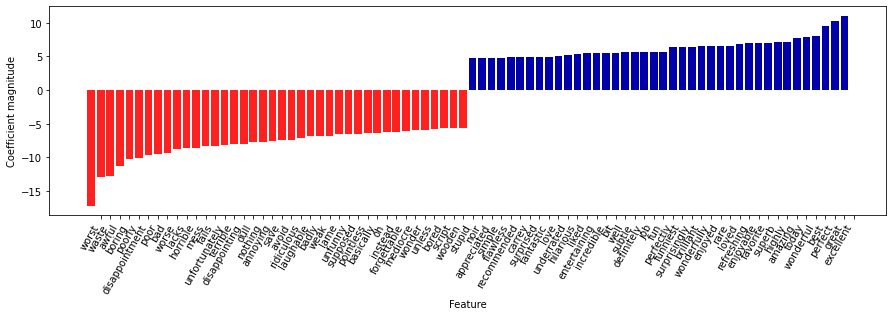

In [22]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_, feature_names, n_top_features = 40)

In [23]:
print(f"bards_words:\n{bards_words}")
cv = CountVectorizer(ngram_range = (1, 1)).fit(bards_words)
print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names()}")
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names()}")

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']
Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']
Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [24]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [25]:
cv = CountVectorizer(ngram_range = (1, 3)).fit(bards_words)
print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names()}")

Vocabulary size: 39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [26]:
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression(max_iter = 10000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(text_train, y_train)
print(f"Best cross-validation score: {(grid.best_score_):.3f}")
print(f"Best parameters: {grid.best_params_}")

Best cross-validation score: 0.906
Best parameters: {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


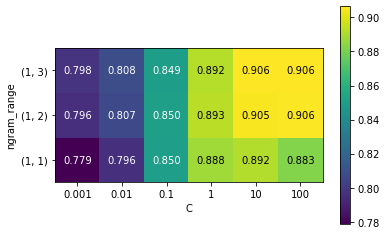

In [27]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(scores, xlabel = 'C', ylabel = 'ngram_range', fmt = "%.3f", xticklabels = param_grid['logisticregression__C'], yticklabels = param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

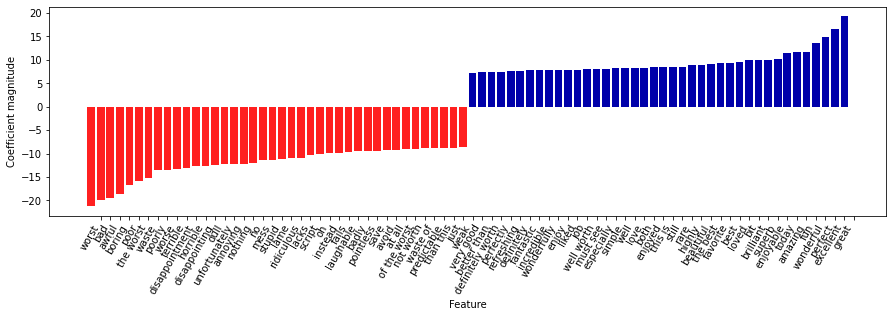

In [28]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

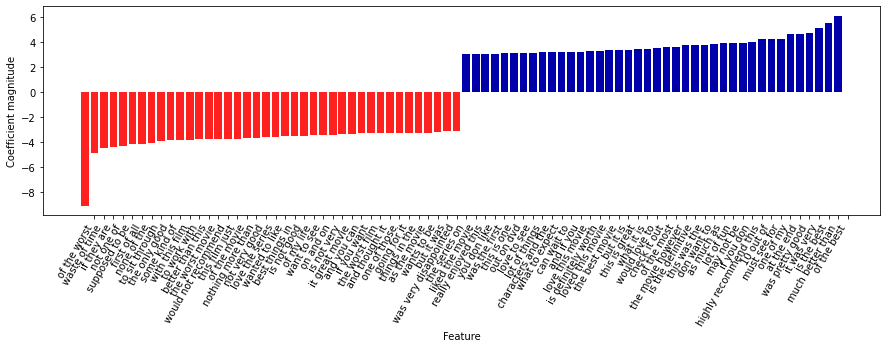

In [29]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

In [39]:
import spacy
import en_core_web_sm
import nltk

en_nlp = spacy.load("en_core_web_sm")
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [59]:
vect = CountVectorizer(max_features = 10000, max_df = 0.15)
X = vect.fit_transform(text_train)

In [62]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, learning_method = 'batch', max_iter = 25, random_state = 0)
document_topics = lda.fit_transform(X)

In [63]:
print(f"lda.components_.shape: {lda.components_.shape}")

lda.components_.shape: (10, 10000)


In [66]:
sorting = np.argsort(lda.components_, axis = 1)[:, ::-1]
print(sorting.shape)
print(sorting[:5])
feature_names = np.array(vect.get_feature_names())

(10, 10000)
[[ 994 9970 3383 ... 2401 9364 2631]
 [9672 9900 9465 ... 3454  775 2891]
 [3764 9911 1866 ...  348  887  879]
 [8074 7924 3133 ...  879 1442 3801]
 [2610 7755  430 ... 5461  879 9754]]


In [67]:
mglearn.tools.print_topics(topics = range(10), feature_names = feature_names, sorting = sorting, topics_per_chunk = 5, n_words = 10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [74]:
lda100 = LatentDirichletAllocation(n_components = 100, learning_method = 'batch', max_iter = 25, random_state = 0)
document_topics100 = lda100.fit_transform(X)

In [72]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
 # show first two sentences
 print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

ValueError: The number of FixedLocator locations (50), usually from a call to set_ticks, does not match the number of ticklabels (10).

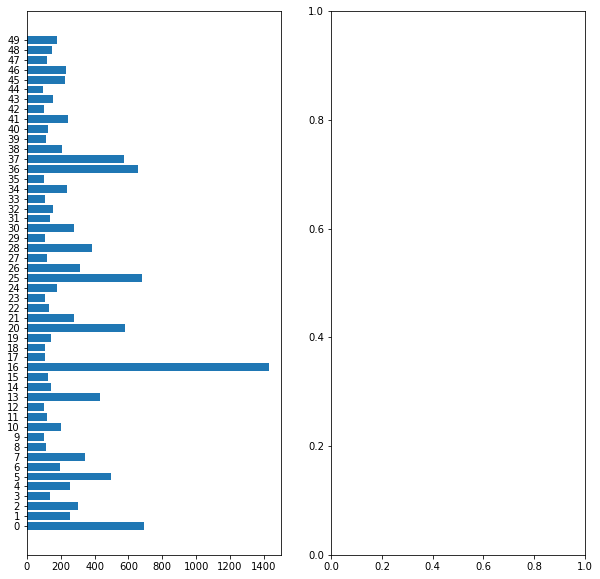

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
 for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
 start = col * 50
 end = (col + 1) * 50
 ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
 ax[col].set_yticks(np.arange(50))
 ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
 ax[col].invert_yaxis()
 ax[col].set_xlim(0, 2000)
 yax = ax[col].get_yaxis()
 yax.set_tick_params(pad=130)
plt.tight_layout()